## Questions
<ul>
    <li><b>What was the change in price of the stock over time?</b></li>
    <li><b>What was the daily return of the stock on average?</b></li>
    <li><b>What was the moving average of the various stock??</b></li>
    <li><b>What was the correlation between different stocks' closing prices??</b></li>
    <li><b>What was the correlation between different stocks' daily returns??</b></li>
    <li><b>How much value do we put at risk by investing in a particular stock??</b></li>
    <li><b>How can we attempt to predict stock behavior??</b></li>
</ul>

In [1]:
# Core
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas_datareader.data as web
from datetime import datetime

In [3]:
sns.set_style("whitegrid")

In [4]:
tech_list = ["AAPL","GOOG","MSFT","AMZN"]

In [5]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, "yahoo", start, end)

In [8]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-10,111.089996,111.089996,105.830002,107.790001,106.084061,57134500
2016-11-11,107.120003,108.870003,106.550003,108.430000,106.713936,34094100
2016-11-14,107.709999,107.809998,104.080002,105.709999,104.036980,51175500
2016-11-15,106.570000,107.680000,106.160004,107.110001,105.414825,32264500
2016-11-16,106.699997,110.230003,106.599998,109.989998,108.249237,58840500


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2016-11-10 to 2017-11-10
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


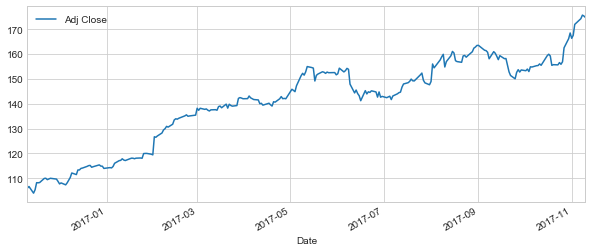

In [10]:
AAPL["Adj Close"].plot(legend=True,figsize=(10,4))

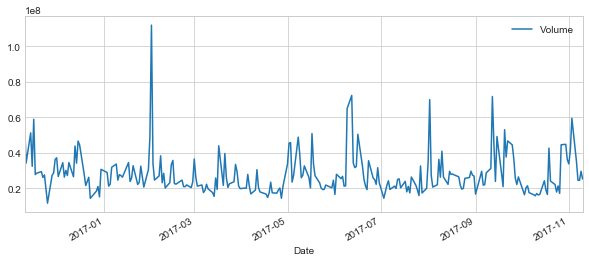

In [11]:
AAPL["Volume"].plot(legend=True, figsize=(10,4))